All models are made on data frame consisting of order_id, sector_id, delivery_time, total_weight, driver_id. 

- delivery_time is actual time of delivering order
- total_weight is variable consisting of product of weight of package and quantity in order
- order_id, sector_id, driver_id are identifiers of  order, sector, driver.

Delivery time after deleting rows consisting of cotradictionary data like nonpositive time is positive integer. 

Total weight is sum of weight of invidual product in order,no additional engeneering needed, positive integer as well.

None of columns have missing data.

## 1.

Current predictions of delivery times for future orders is done by calculating the mean from all 
collected data This algorythm produces luckluster rusults. Proposed solution was to make diffrent predictions per sector. As seen on figure below 2nd sector and 3rd sector have simillar influence. Therefore division to three sectors does not seem beneficial enough to justify creating 3 models and lessening access to bigger pool of data for 2nd and 3rd sector. It is advisable to divide data into two parts, 1st sectors and ther others. Then creating linear regression or another regression model for each invidual part seems like the best solution to this problem.

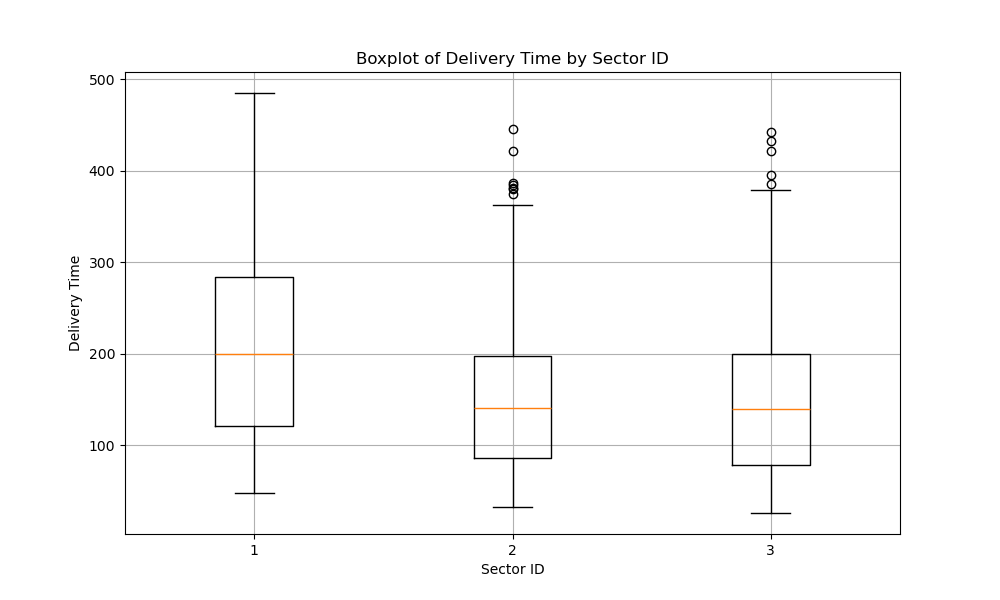

## 2.

I propose regession models such as:

- Linear regression
- XGBoost regression
- Random forrest regression


After doing train - test split on data, each model will be fitted, cross validated and evaluated based on metrics such as R-squared, mean square error, mean absolute error. And here are the results of that process.

|                   |   Mean Absolute Error |   Mean Squared Error |   Root Mean Squared Error |   R-squared |   Mean CV Score |   Std CV Score |
|:------------------|----------------------:|---------------------:|--------------------------:|------------:|----------------:|---------------:|
| Linear Regression |                 35    |              2063.18 |                     45.42 |        0.77 |         2171.16 |         185.97 |
| XGBoost           |                 31.15 |              1702.25 |                     41.26 |        0.81 |         1974.9  |         308.33 |
| Random Forest     |                 32.57 |              1835.59 |                     42.84 |        0.8  |         1865.7  |         24 |1  |

|      |   total_weight |   sector_id |   driver_id |
|:-----|---------------:|------------:|------------:|
| coef |     0.00871171 |    -35.8297 |     66.1011 |1  |

The metrics are pointing for XGBoost regressor to be the best model, because of the lowest values of errors and the biggest R-squared, but it is the most vulnerable to new data. Random forrest regressor seems to be more robust to new data while achieving simillar metrics results to XGBoost model, but both of them lack interpretability of linear regression. In my opinion slightly worse scores of linear regression are not enough to lose that interpretability of model, which could clearly show which area of delivery could lead to improving delivery times. In this case looking at the coeficient of linear regression for driver_id we can see that there is clear diffrence in delivery times fo each driver. The diffrence may be influenced by the experience of invidual driver.

## 3.


I do believe that the low delivery times of 1st driver come down to 3 main options

- there is diffrence of method of delivering package from the rest of drivers. To elaborate, the 1st driver might contact the client beforehand and direct the more accurate time of delivery. By doing so driver increses prepardness of client for receiving a delivery. Due to that time for delivery can drastically shorten.
- familarity with the sector, the time losses could accumulate easly if driver is not accustomed to delivery sector.
- experience, both of above reasons are influenced by the time the drivers put into work..

## 4.

Additional data worth collecting could be:

- information about experience of driver
- rating of drivers
- data on traffic patterns

## 5

First of all under-estimating will lead to customer disatisfaction and could influence badly reputation of brand. No customer wants to wait for their food after the declared time.

On the other hand, over-estimating will lead to underutilization of resources such as delivery personnel and vehicles, giving higher operational costs and reduced profitability.